In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
names = ['preg','plas', 'pres','skin','test','mass','pedi','age','class']
df = pd.read_csv('pima-indians-diabetes.data (1).csv', names=names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [5]:
df[df.duplicated()].shape

(0, 9)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,0:8])
scaled_df

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [7]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns[:8])
scaled_df

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [8]:
x = scaled_df
y = df['class']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.3, random_state=0)

In [10]:
x_train

,preg,plas,pres,skin,test,mass,pedi,age
580,-1.141852,0.942215,1.080200,1.597279,-0.692891,1.282826,-0.304658,-1.041549
418,-0.844885,-1.185991,-0.057150,-1.288212,-0.692891,-1.750544,0.459432,-0.531023
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
363,0.046014,0.785730,0.459827,-1.288212,-0.692891,0.825917,0.145339,2.872487
757,-1.141852,0.065895,0.149641,-1.288212,-0.692891,0.546695,-0.645932,1.596171
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
192,0.936914,1.192592,-0.160546,-1.288212,-0.692891,-0.202129,-0.268417,0.234767
629,0.046014,-0.841722,-0.212243,0.091805,-0.692891,-0.925569,-0.978145,-1.041549
559,2.124780,-1.123396,0.253036,-1.288212,-0.692891,-0.240205,-0.519087,0.149679


In [11]:
y_train

580    1
418    0
764    0
363    1
757    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: class, Length: 537, dtype: int64

In [12]:
num_folds = 10
kfold = KFold(n_splits=10)
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [13]:
model = KNeighborsClassifier(n_neighbors=12)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [14]:
pred = model.predict(x_test)
pd.Series(pred).value_counts()

0    182
1     49
dtype: int64

In [15]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
165    1
188    1
334    0
758    0
34     0
Name: class, Length: 231, dtype: int64

In [16]:
pd.crosstab(y_test, pred)

col_0,0,1
class,,
0,142,15
1,40,34


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.7619047619047619

In [18]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, x, y, cv=kfold)
results

array([0.68831169, 0.83116883, 0.7012987 , 0.66233766, 0.72727273,
       0.74025974, 0.75324675, 0.83116883, 0.69736842, 0.77631579])

In [19]:
print(results.mean())

0.7408749145591252


### Grid Search for Algorithm Tuning

In [20]:
from sklearn.model_selection import GridSearchCV
names = ['preg','plas', 'pres','skin','test','mass','pedi','age','class']
g_df = pd.read_csv('pima-indians-diabetes.data (1).csv', names=names)

In [21]:
g_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
g_scaler = StandardScaler()
g_scaler_df = g_scaler.fit_transform(g_df)
g_scaler_df

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [23]:
g_scaler_df = pd.DataFrame(g_scaler_df, columns=g_df.columns[:8])
g_scaler_df

ValueError: Shape of passed values is (768, 9), indices imply (768, 8)

In [ ]:
x = g_scaler_df
y = g_df['class']

In [ ]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x,y)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

### Visualizing the CV results

In [38]:
k_range = range(1,40)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending=True)

0     0.705725
1     0.714781
3     0.729118
5     0.734364
4     0.738243
25    0.738380
7     0.739525
13    0.739576
15    0.739576
23    0.740926
6     0.742174
9     0.742208
2     0.743438
11    0.743472
31    0.743558
32    0.743575
10    0.744788
8     0.746104
16    0.746121
26    0.746206
12    0.747351
14    0.747403
33    0.747437
27    0.747471
35    0.748753
24    0.748770
36    0.748770
22    0.750034
21    0.750051
34    0.750103
17    0.751282
37    0.751333
30    0.751384
28    0.751384
29    0.751401
19    0.752649
38    0.755280
18    0.756562
20    0.761757
dtype: float64

In [39]:
pd.Series(k_scores).max()

0.7617566643882434

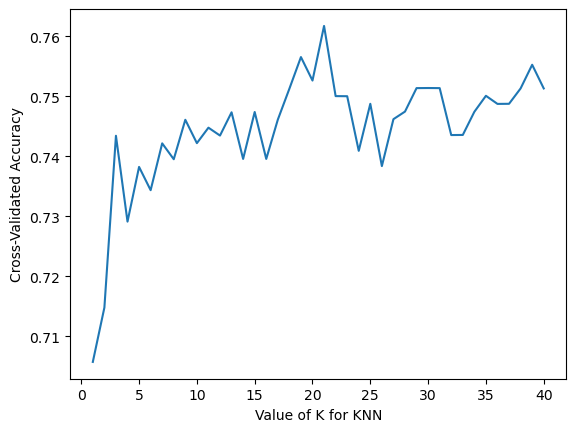

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

k_range = range(1,41)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()